# AI-AUG-Minor Project by Siddhartha Sinha

# Building a Neural Network to Classify Breast tumours as Malignant or Benign

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('C:/Users/KIIT/Documents/VERZEO/AI MINOR/breast_cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
del df['Unnamed: 32']

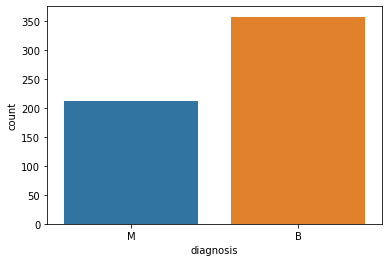

In [4]:
graph = sb.countplot(x='diagnosis',data=df)
plt.show()

In [5]:
x=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [6]:
from sklearn.preprocessing import LabelEncoder
le_x1=LabelEncoder()
y=le_x1.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [7]:
x_train.shape

(455, 30)

In [8]:
x_test.shape

(114, 30)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

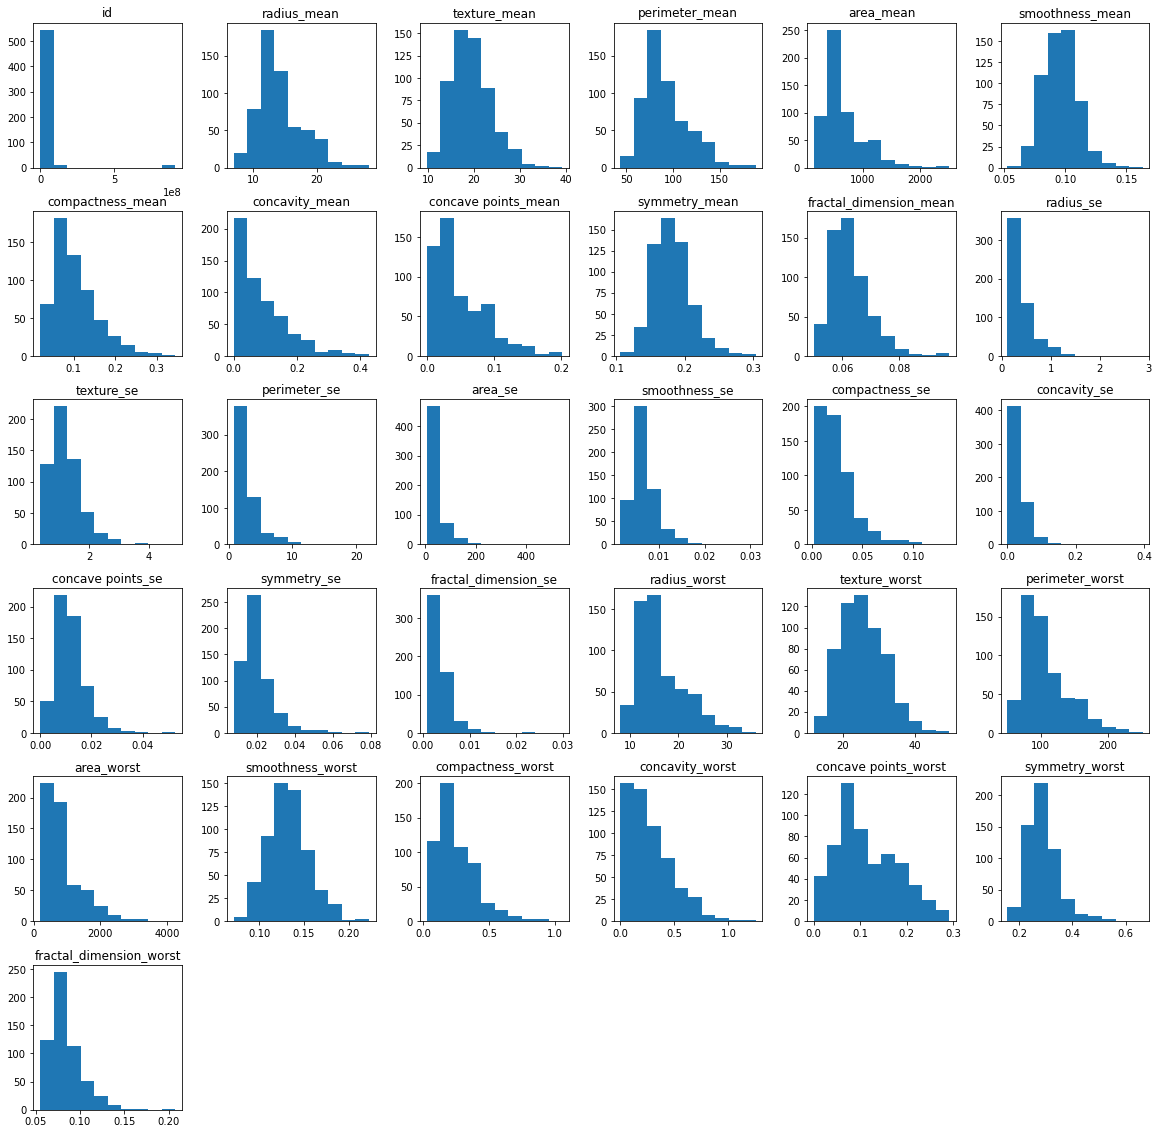

In [9]:
df.hist(bins=10,figsize=(20,20),grid=False)

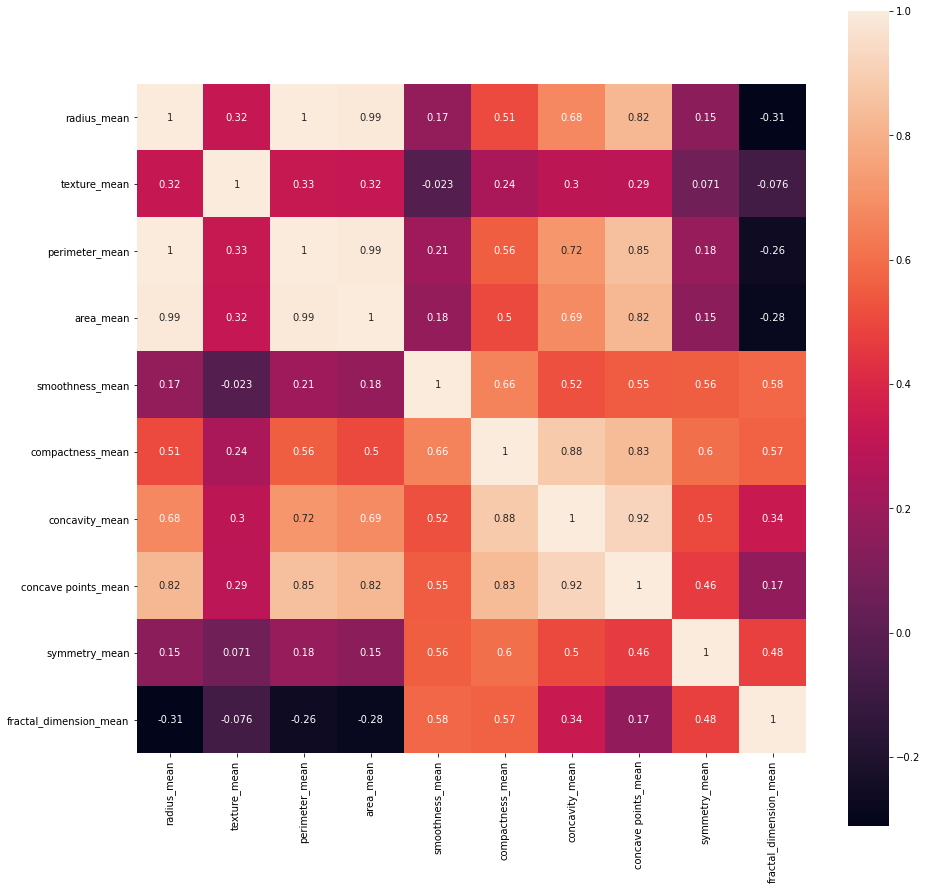

In [10]:
f_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sb.heatmap(df[f_mean].corr(), vmax=1, square=True, annot=True)

<Figure size 432x288 with 0 Axes>

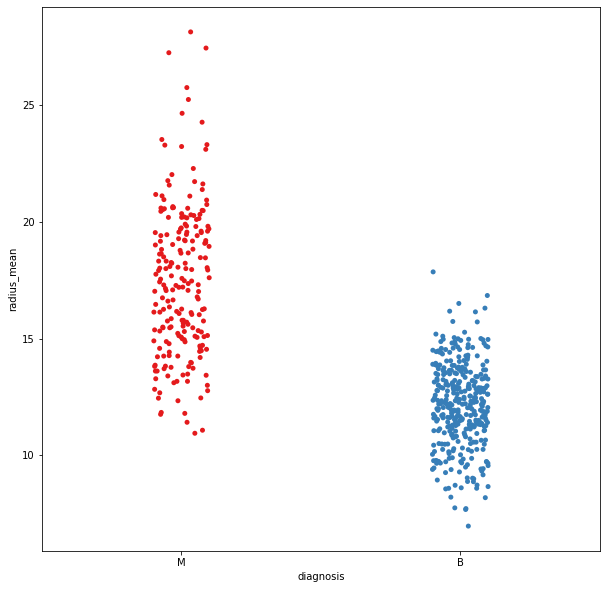

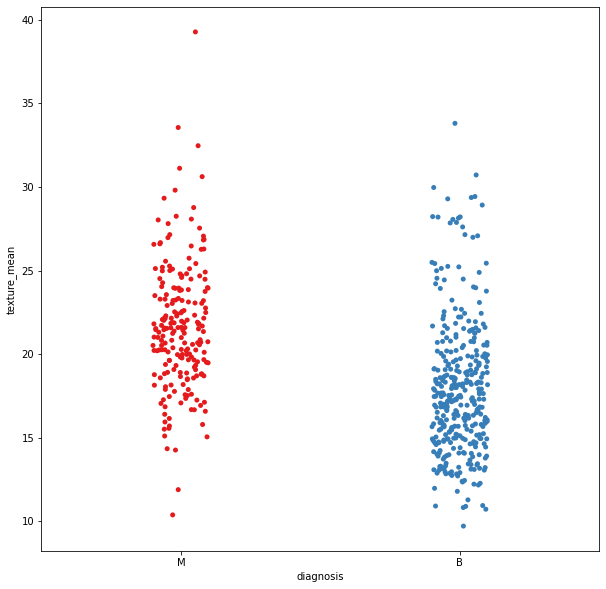

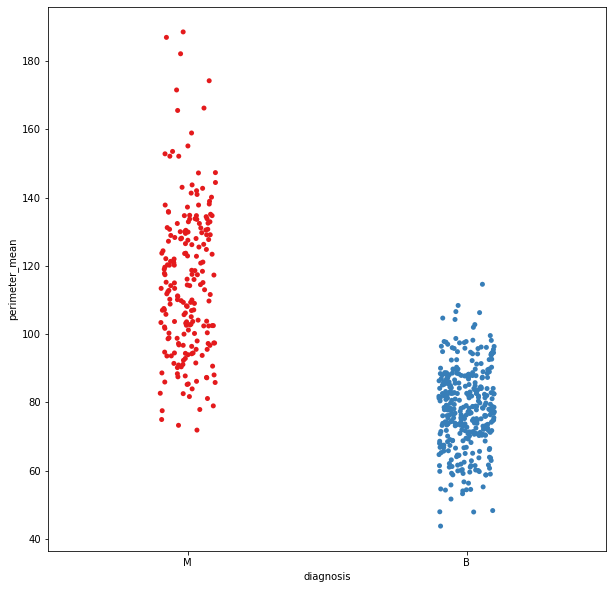

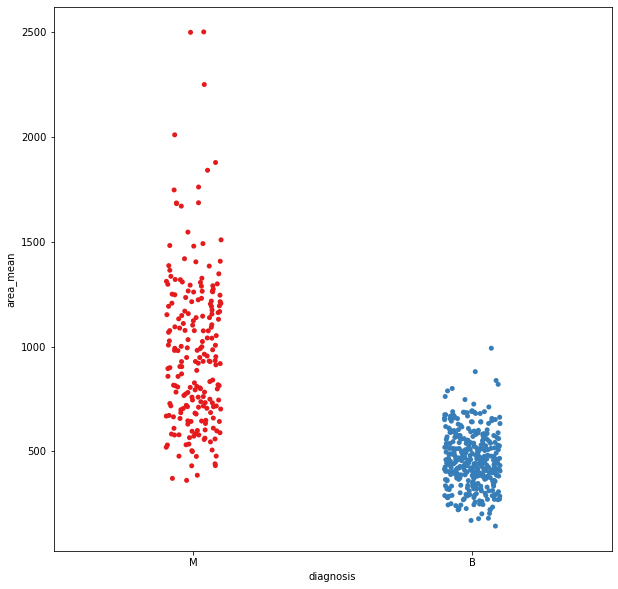

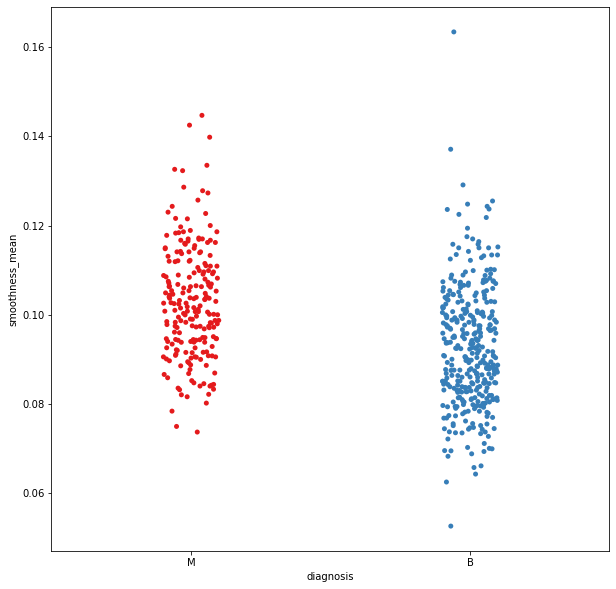

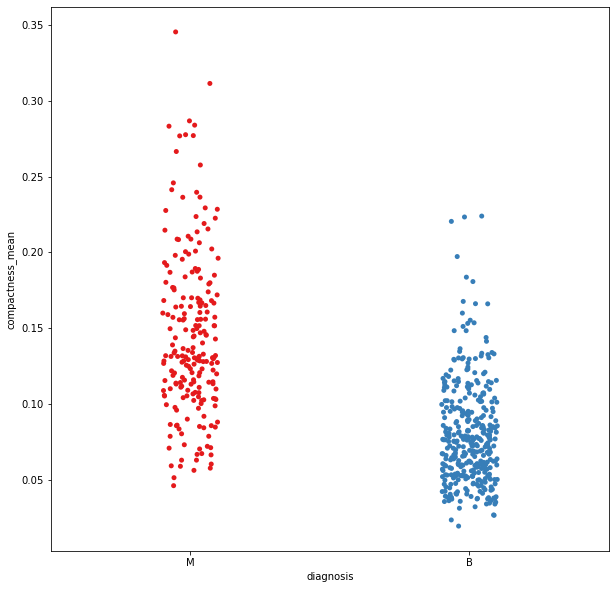

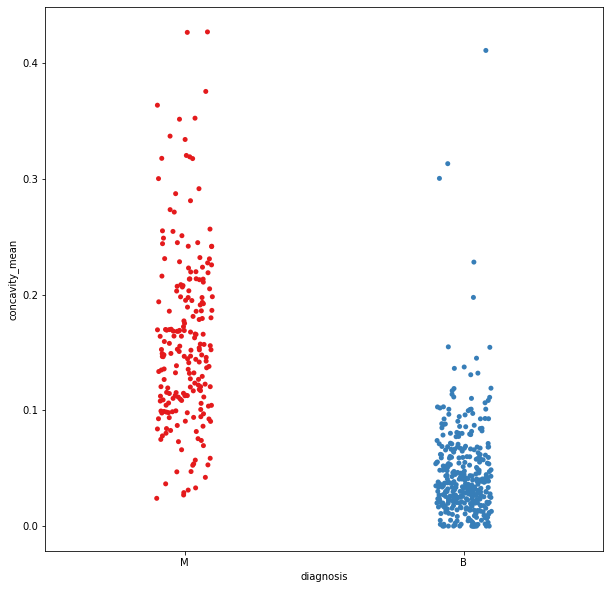

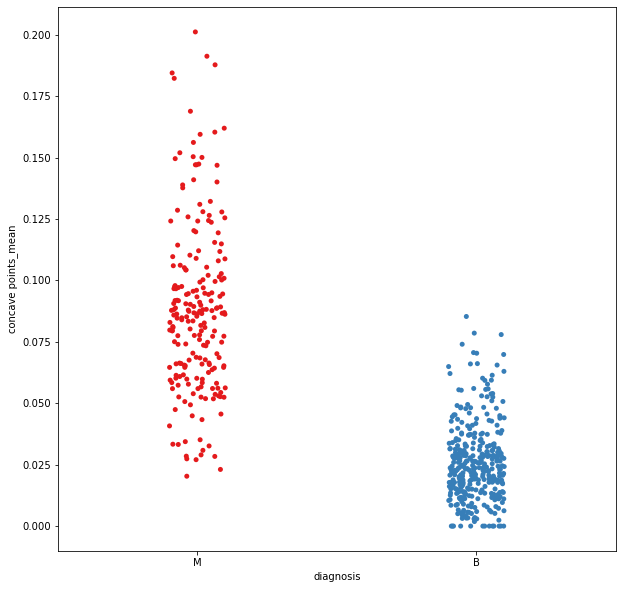

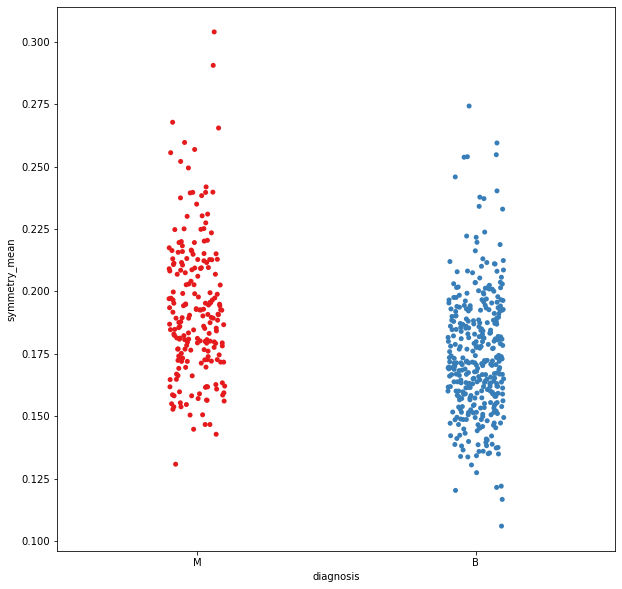

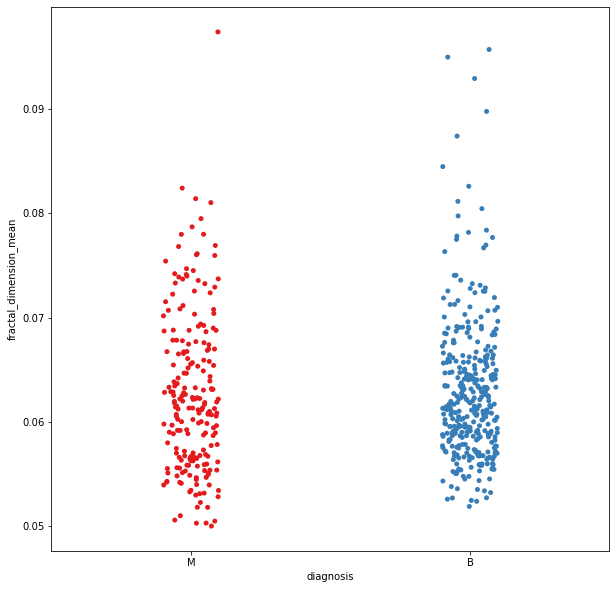

In [11]:
df_drop = df.drop('diagnosis',axis=1)
df_drop = df_drop[f_mean]
for index,columns in enumerate(df_drop):
    plt.figure(index)
    plt.figure(figsize=(10,10))
    sb.stripplot(x='diagnosis', y= columns, data= df, jitter=True, palette = 'Set1');
    

<Figure size 432x288 with 0 Axes>

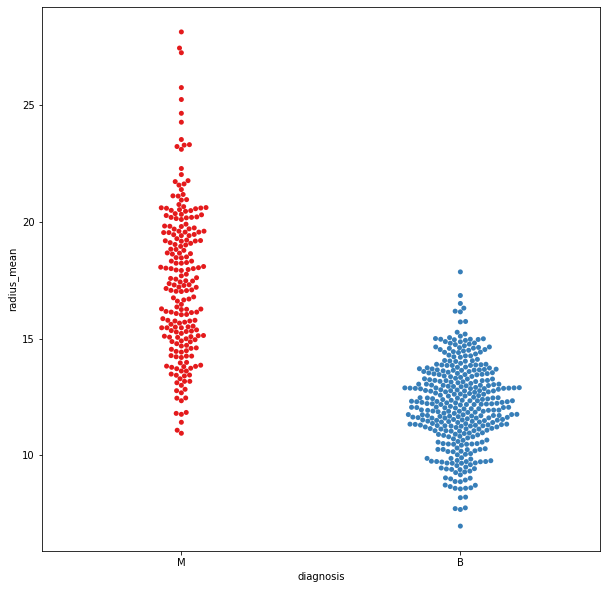

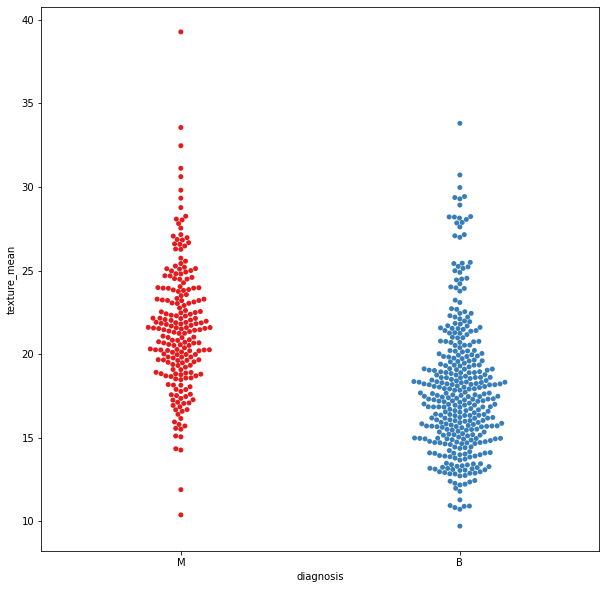

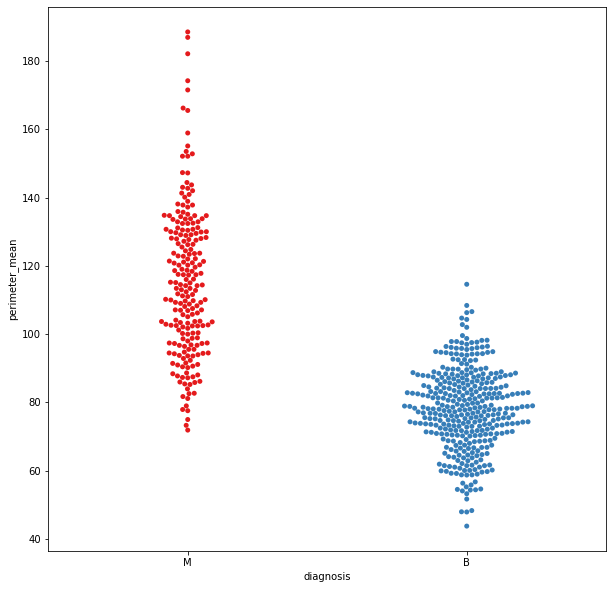

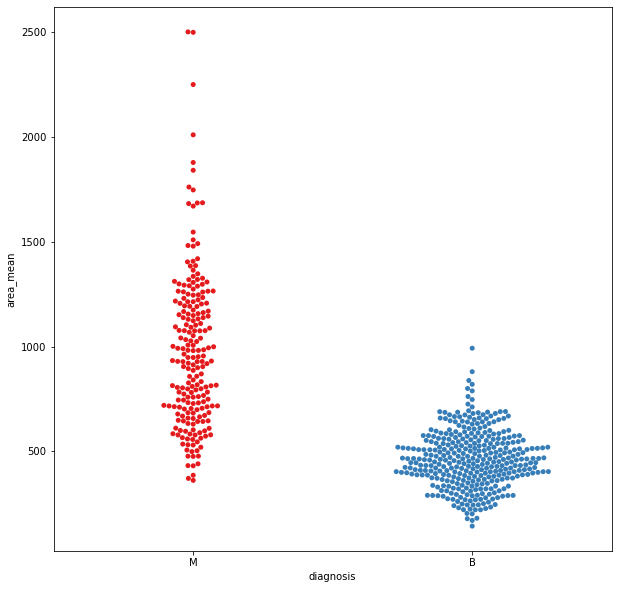

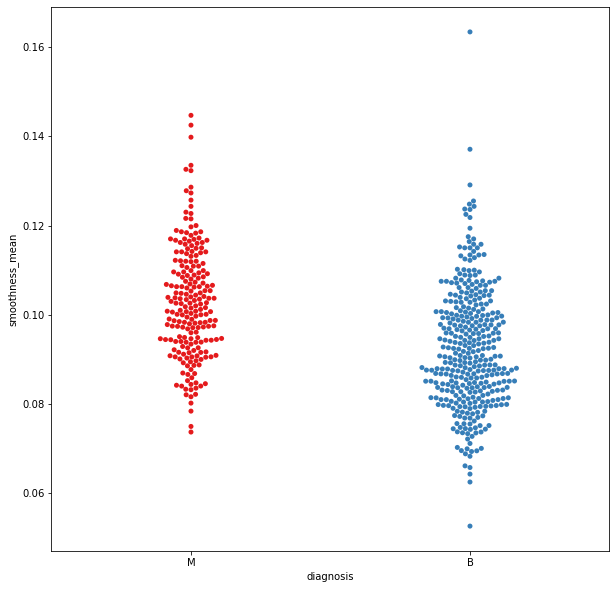

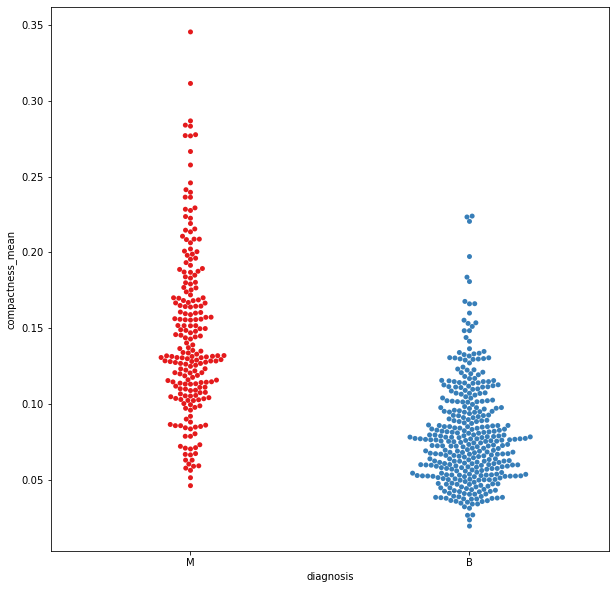

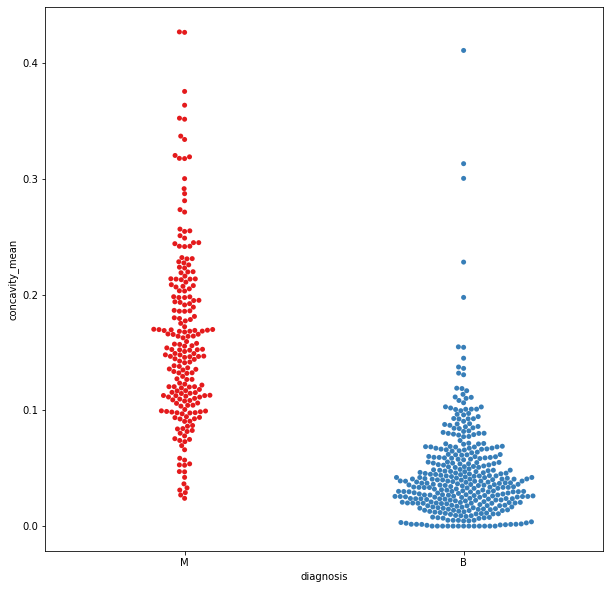

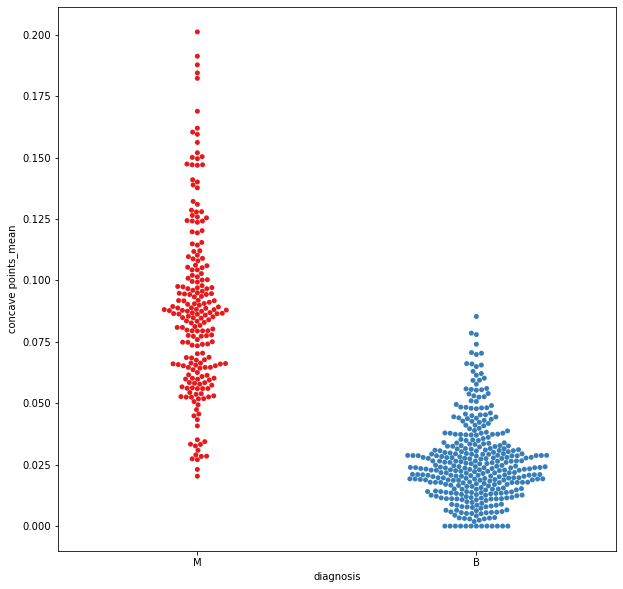

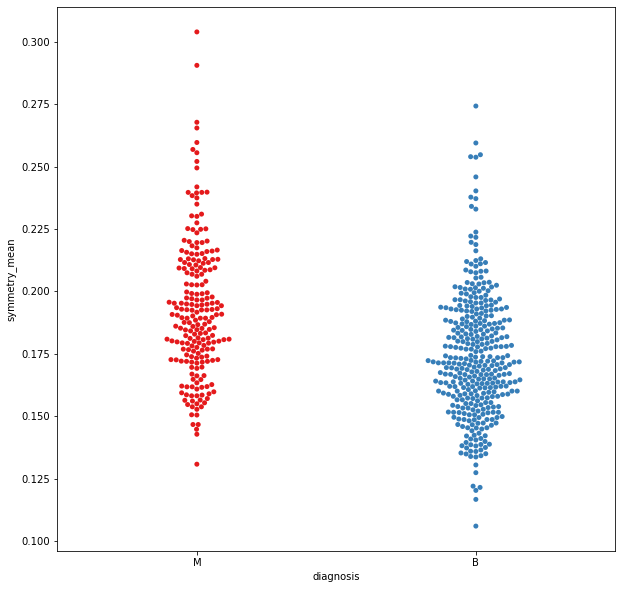

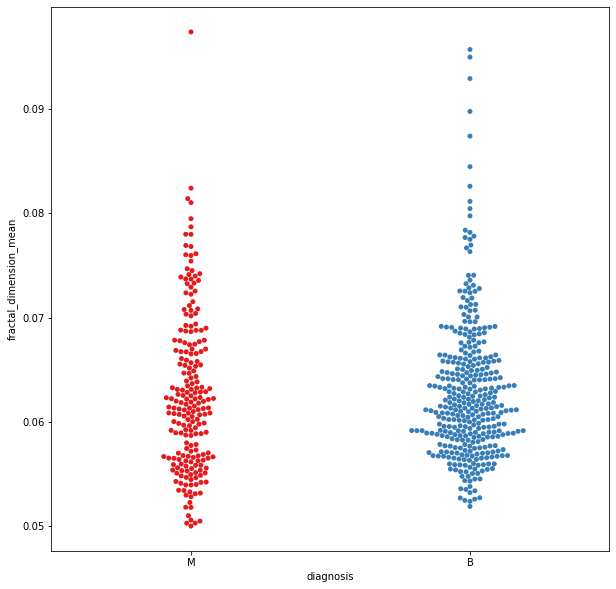

In [12]:
for index,columns in enumerate(df_drop):
    plt.figure(index)
    plt.figure(figsize=(10,10))
    sb.swarmplot(x='diagnosis', y= columns, data= df, palette = 'Set1')

In [13]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
classifier = Sequential()
classifier.add(Dense(activation="relu",input_dim=30, units=16, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [15]:
classifier.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
classifier.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
455/455 [==============================] - 0s 677us/step - loss: 0.6925 - accuracy: 0.6615
Epoch 2/100
455/455 [==============================] - 0s 35us/step - loss: 0.6908 - accuracy: 0.6549
Epoch 3/100
455/455 [==============================] - 0s 35us/step - loss: 0.6884 - accuracy: 0.6681
Epoch 4/100
455/455 [==============================] - 0s 35us/step - loss: 0.6848 - accuracy: 0.7385
Epoch 5/100
455/455 [==============================] - 0s 35us/step - loss: 0.6795 - accuracy: 0.8132
Epoch 6/100
455/455 [==============================] - 0s 35us/step - loss: 0.6721 - accuracy: 0.8835
Epoch 7/100
455/455 [==============================] - 0s 35us/step - loss: 0.6611 - accuracy: 0.9253
Epoch 8/100
455/455 [==============================] - 0s 35us/step - loss: 0.6464 - accuracy: 0.9363
Epoch 9/100
455/455 [==============================] - 0s 36us/step - loss: 0.6269 - accuracy: 0.9429
Epoch 10/100
455/455 [==============================] - 0s 35us/step - loss: 0.60

455/455 [==============================] - 0s 35us/step - loss: 0.0508 - accuracy: 0.9890
Epoch 81/100
455/455 [==============================] - 0s 35us/step - loss: 0.0504 - accuracy: 0.9890
Epoch 82/100
455/455 [==============================] - 0s 35us/step - loss: 0.0500 - accuracy: 0.9890
Epoch 83/100
455/455 [==============================] - 0s 35us/step - loss: 0.0498 - accuracy: 0.9890
Epoch 84/100
455/455 [==============================] - 0s 35us/step - loss: 0.0493 - accuracy: 0.9890
Epoch 85/100
455/455 [==============================] - 0s 35us/step - loss: 0.0491 - accuracy: 0.9890
Epoch 86/100
455/455 [==============================] - 0s 43us/step - loss: 0.0487 - accuracy: 0.9890
Epoch 87/100
455/455 [==============================] - 0s 37us/step - loss: 0.0484 - accuracy: 0.9890
Epoch 88/100
455/455 [==============================] - 0s 35us/step - loss: 0.0481 - accuracy: 0.9890
Epoch 89/100
455/455 [==============================] - 0s 35us/step - loss: 0.0477 - 

In [17]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [18]:
 from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)

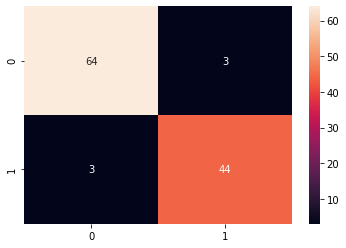

In [19]:
sb.heatmap(con,annot=True)
plt.savefig('heatmap_cancer.png')

In [20]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [21]:
y_test=(y_test>0.5)
y_test

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True, False])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9473684210526315

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        67
        True       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

